In [1]:
%run ExoTides_analytic.ipynb # load functions 

<ipython-input-1-8b6a531e9d52>:76: RuntimeWarning: divide by zero encountered in double_scalars
  B = -Tg/(Ka*qo)
<ipython-input-1-8b6a531e9d52>:76: RuntimeWarning: divide by zero encountered in double_scalars
  B = -Tg/(Ka*qo)


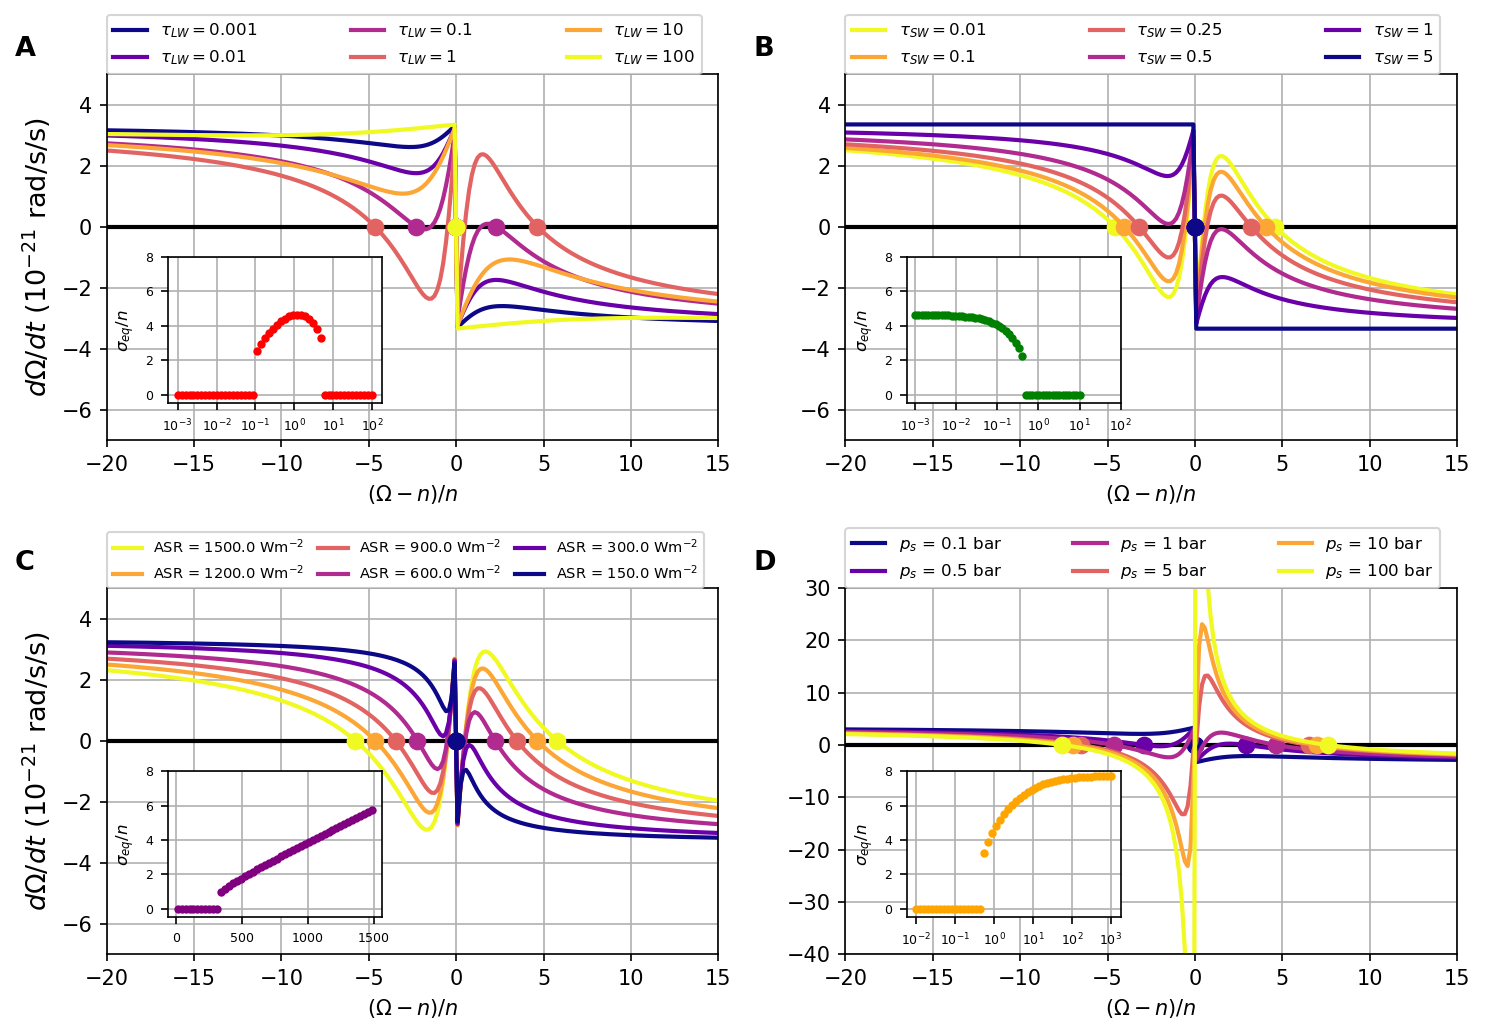

In [71]:
fig, ax = plt.subplots(2,2,figsize=(10,7), dpi=150, tight_layout=True)
Omega_list = np.linspace(-20*n, 21*n, 250)
taulw_list_fig4 = [1e-3, 1e-2, 1e-1, 1, 10, 100]
color= plt.cm.plasma(np.linspace(0,1,len(taulw_list_fig4)))
M_fig4 = 0.7*M_sun
a_fig4 = 0.33*AU
S, n = S_from_a(M_fig4,a_fig4)
k2 = 0.23
Tg = gravitational_tide_torque(M_fig4, R_E, a_fig4, 100,100, k2, Omega_list, n)


ax[0,0].axhline(y=0, linewidth = 2, color = 'k')
ax[0,1].axhline(y=0, linewidth = 2, color = 'k')
ax[1,0].axhline(y=0, linewidth = 2, color = 'k')
ax[1,1].axhline(y=0, linewidth = 2, color = 'k')

for i in range(len(taulw_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4, S, 0.2, 0.0001, taulw_list_fig4[i], 1*bar, Omega_list,n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.0001, taulw_list_fig4[i], 1*bar, 100, 100, k2)/2 # returns 2(Omega-n)
    ax[0,0].plot((Omega_list-n)/n, 1e21*(Ta + Tg)/I , '-', color = color[i], linewidth = 2,label = '$\\tau_{LW} = $' + str(taulw_list_fig4 [i]))
    ax[0,0].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)


ax[0,0].grid()
ax[0,0].set_ylabel('$d\Omega/dt$ ($10^{-21}$ rad/s/s)', fontsize = 13)
ax[0,0].set_xlabel('$(\\Omega -n)/n$')



tausw_list_fig4 = [1e-2, 1e-1,0.25,0.5, 1, 5]
color= plt.cm.plasma_r(np.linspace(0,1,len(tausw_list_fig4)))
for i in range(len(tausw_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4, S, 0.2, tausw_list_fig4[i],1,1*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, tausw_list_fig4[i],1, 1*bar, 100, 100, k2)/2
    ax[0,1].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = '$\\tau_{SW} = $' + str(tausw_list_fig4[i]))
    ax[0,1].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
ax[0,1].legend(ncol =4, mode='expand', fontsize=8)
ax[0,1].grid()
ax[0,1].set_xlabel('$(\\Omega -n)/n$')



alpha_list_fig4 = [0,0.2,0.4,0.6,0.8,0.9]
color= plt.cm.plasma_r(np.linspace(0,1,len(alpha_list_fig4)))
for i in range(len(alpha_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4,S, alpha_list_fig4[i], 0.001,1,1*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,alpha_list_fig4[i], 0.001, 1, 1*bar, 100, 100, k2)/2
    ax[1,0].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = 'ASR = ' + str(np.round(S*(1-alpha_list_fig4[i]),-1)) + ' Wm$^{-2}$')
    ax[1,0].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
    
ax[1,0].legend(ncol =3, mode='expand', fontsize=7.2)
ax[1,0].grid()
ax[1,0].set_ylabel('$d\Omega/dt$ ($10^{-21}$ rad/s/s)', fontsize = 13)
ax[1,0].set_xlabel('$(\\Omega -n)/n$')



ps_list_fig4 = [1e-1, 0.5,1, 5,10,100]
color= plt.cm.plasma(np.linspace(0,1,len(ps_list_fig4)))
for i in range(len(ps_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4,S, 0.2, 0.001,1,ps_list_fig4[i]*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, 0.0001, 1,ps_list_fig4[i]*bar,100, 100, k2)/2
    ax[1,1].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = '$p_s$ = ' + str(ps_list_fig4[i]) + ' bar')
    ax[1,1].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
ax[1,1].legend(ncol =3, mode='expand', fontsize=8)
ax[1,1].grid()
ax[1,1].set_xlabel('$(\\Omega -n)/n$')




ax[0,0].set_xlim(-20,15)
ax[0,1].set_xlim(-20,15)
ax[1,0].set_xlim(-20,15)
ax[1,1].set_xlim(-20,15)

ax[0,0].set_ylim(-7,5)
ax[0,1].set_ylim(-7,5)
ax[1,0].set_ylim(-7,5)
ax[1,1].set_ylim(-40,30)

ax[0,0].legend(ncol =3, mode='expand', fontsize=8, loc = (0,1))
ax[0,1].legend(ncol =3, mode='expand', fontsize=8, loc = (0,1))
ax[1,0].legend(ncol =3, mode='expand', fontsize=7, loc = (0,1))
ax[1,1].legend(ncol =3, mode='expand', fontsize=8, loc = (0,1))

ax[0,0].text(-0.15, 1.05,'A', transform=ax[0,0].transAxes, size=13, weight='bold')
ax[0,1].text(-0.15, 1.05,'B', transform=ax[0,1].transAxes, size=13, weight='bold')
ax[1,0].text(-0.15, 1.05,'C', transform=ax[1,0].transAxes, size=13, weight='bold')
ax[1,1].text(-0.15, 1.05,'D', transform=ax[1,1].transAxes, size=13, weight='bold')

## add inset eq. rot plots 
taulw_list_fig4 = 10**np.linspace(-3,2, 50)
tausw_list_fig4 = 10**np.linspace(-3,1, 50)
alpha_list_fig4 = np.linspace(0.01,0.99, 50)
ps_list_fig4 = 10**np.linspace(-2,3,50)




from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax2 = ax[0,0].inset_axes([0.1, 0.1, 0.35, 0.4])
ax3 = ax[0,1].inset_axes([0.1, 0.1, 0.35, 0.4])
ax4 = ax[1,0].inset_axes([0.1, 0.1, 0.35, 0.4])
ax5 = ax[1,1].inset_axes([0.1, 0.1, 0.35, 0.4])

for i in range(len(taulw_list_fig4)):
    ax2.plot(taulw_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, 0.0001,taulw_list_fig4[i], 1*bar, 100, 100, k2)/2/n, 'r.')
    ax3.plot(tausw_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, tausw_list_fig4[i], 1,1*bar, 100, 100, k2)/2/n, 'g.')
    ax4.plot(S*(1-alpha_list_fig4[i]), eq_rotation_ana(M_fig4, R_E, a_fig4,alpha_list_fig4[i], 0.0001,1, 1*bar, 100, 100, k2)/2/n, '.', color = 'purple')
    ax5.plot(ps_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.0001,1, ps_list_fig4[i]*bar, 100, 100, k2)/2/n, '.', color = 'orange')

ax2.grid()
ax2.set_ylim(-0.5,8)
ax2.set_xscale('log')
ax2.set_xticks([1e-3,1e-2,1e-1,1,10,100])
ax2.set_ylabel('$\sigma_{eq}/n$', fontsize=8)
ax2.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='minor', labelsize=6)

ax3.grid()
ax3.set_ylim(-0.5,8)
ax3.set_xscale('log')
ax3.set_xticks([1e-3,1e-2,1e-1,1,10,100])
ax3.set_ylabel('$\sigma_{eq}/n$', fontsize=8)
ax3.tick_params(axis='both', which='major', labelsize=6)
ax3.tick_params(axis='both', which='minor', labelsize=6)

ax4.grid()
ax4.set_ylim(-0.5,8)
ax4.set_ylabel('$\sigma_{eq}/n$', fontsize=8)
ax4.tick_params(axis='both', which='major', labelsize=6)
ax4.tick_params(axis='both', which='minor', labelsize=6)

ax5.grid()
ax5.set_xscale('log')
ax5.set_ylim(-0.5,8)
ax5.set_xticks([1e-2,1e-1,1,10,100, 1000])
ax5.set_ylabel('$\sigma_{eq}/n$', fontsize=8)
ax5.tick_params(axis='both', which='major', labelsize=6)
ax5.tick_params(axis='both', which='minor', labelsize=6)


plt.savefig('./Paper Plots/SW_2024_Figure4.pdf', bbox_inches = 'tight')

<ipython-input-1-8b6a531e9d52>:76: RuntimeWarning: divide by zero encountered in double_scalars
  B = -Tg/(Ka*qo)


Text(0.5, 0, '$p_s$ (bar)')

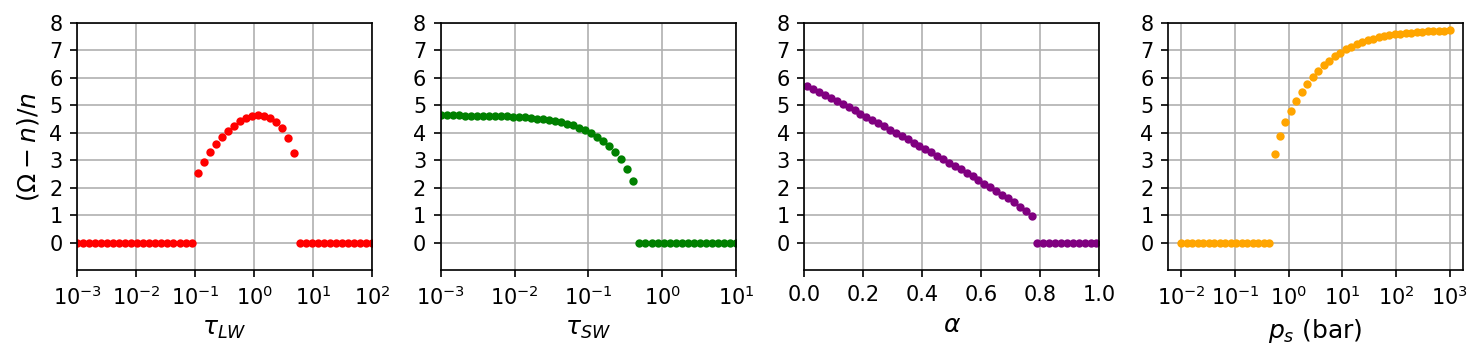

In [3]:
## plot equilibirum rotation rate as a function of model parameters

fig, ax = plt.subplots(1,4, dpi = 150, figsize=(10,2.5), tight_layout=True)
M_fig4 = 0.7*M_sun
a_fig4 = 0.33*AU
k2 = 0.23

taulw_list_fig4 = 10**np.linspace(-3,2, 50)
tausw_list_fig4 = 10**np.linspace(-3,1, 50)
alpha_list_fig4 = np.linspace(0.01,0.99, 50)
ps_list_fig4 = 10**np.linspace(-2,3,50)

S, n = S_from_a(M_fig4,a_fig4)


for i in range(len(taulw_list_fig4)):
    ax[0].plot(taulw_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, 0.0001,taulw_list_fig4[i], 1*bar, 100, 100, k2)/2/n, 'r.')
    ax[1].plot(tausw_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, tausw_list_fig4[i], 1,1*bar, 100, 100, k2)/2/n, 'g.')
    ax[2].plot(alpha_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4,alpha_list_fig4[i], 0.0001,1, 1*bar, 100, 100, k2)/2/n, '.', color = 'purple')
    ax[3].plot(ps_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.0001,1, ps_list_fig4[i]*bar, 100, 100, k2)/2/n, '.', color = 'orange')
    # ax[3].plot(ps_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.0001,1*ps_list_fig4[i], ps_list_fig4[i]*bar, 100, 100, k2)/2/n, '.', color = 'orangered')
    # ax[3].plot(ps_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.1*ps_list_fig4[i],1*ps_list_fig4[i], ps_list_fig4[i]*bar, 100, 100, k2)/2/n, '.', color = 'gold')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[3].set_xscale('log')

for axes in ax:
    axes.set_ylim(-1, 8)
    axes.grid()
    axes.set_yticks([0,1,2,3,4,5,6,7,8])

ax[0].set_xlim(1e-3,1e2)
ax[0].set_xticks([1e-3,1e-2,1e-1,1,10,100])

ax[1].set_xlim(1e-3,10)
ax[1].set_xticks([1e-3,1e-2,1e-1,1,10])

ax[2].set_xlim(0,1)
ax[2].set_xticks([0,0.2,0.4,0.6,0.8,1])

#ax[3].set_xlim(1e-2,1e3)
ax[3].set_xticks([1e-2,1e-1,1,10,100,1000])

ax[0].set_ylabel('$(\\Omega-n)/n$',fontsize=12)
ax[0].set_xlabel('$\\tau_{LW}$',fontsize=12)
ax[1].set_xlabel('$\\tau_{SW}$',fontsize=12)
ax[2].set_xlabel('$\\alpha$',fontsize=12)
ax[3].set_xlabel('$p_s$ (bar)',fontsize=12)

#plt.savefig('./Paper Plots/SW_2024_Figure4.pdf')

<ipython-input-1-8b6a531e9d52>:76: RuntimeWarning: divide by zero encountered in double_scalars
  B = -Tg/(Ka*qo)
<ipython-input-1-8b6a531e9d52>:76: RuntimeWarning: divide by zero encountered in double_scalars
  B = -Tg/(Ka*qo)


Text(-0.15, 1.05, 'H')

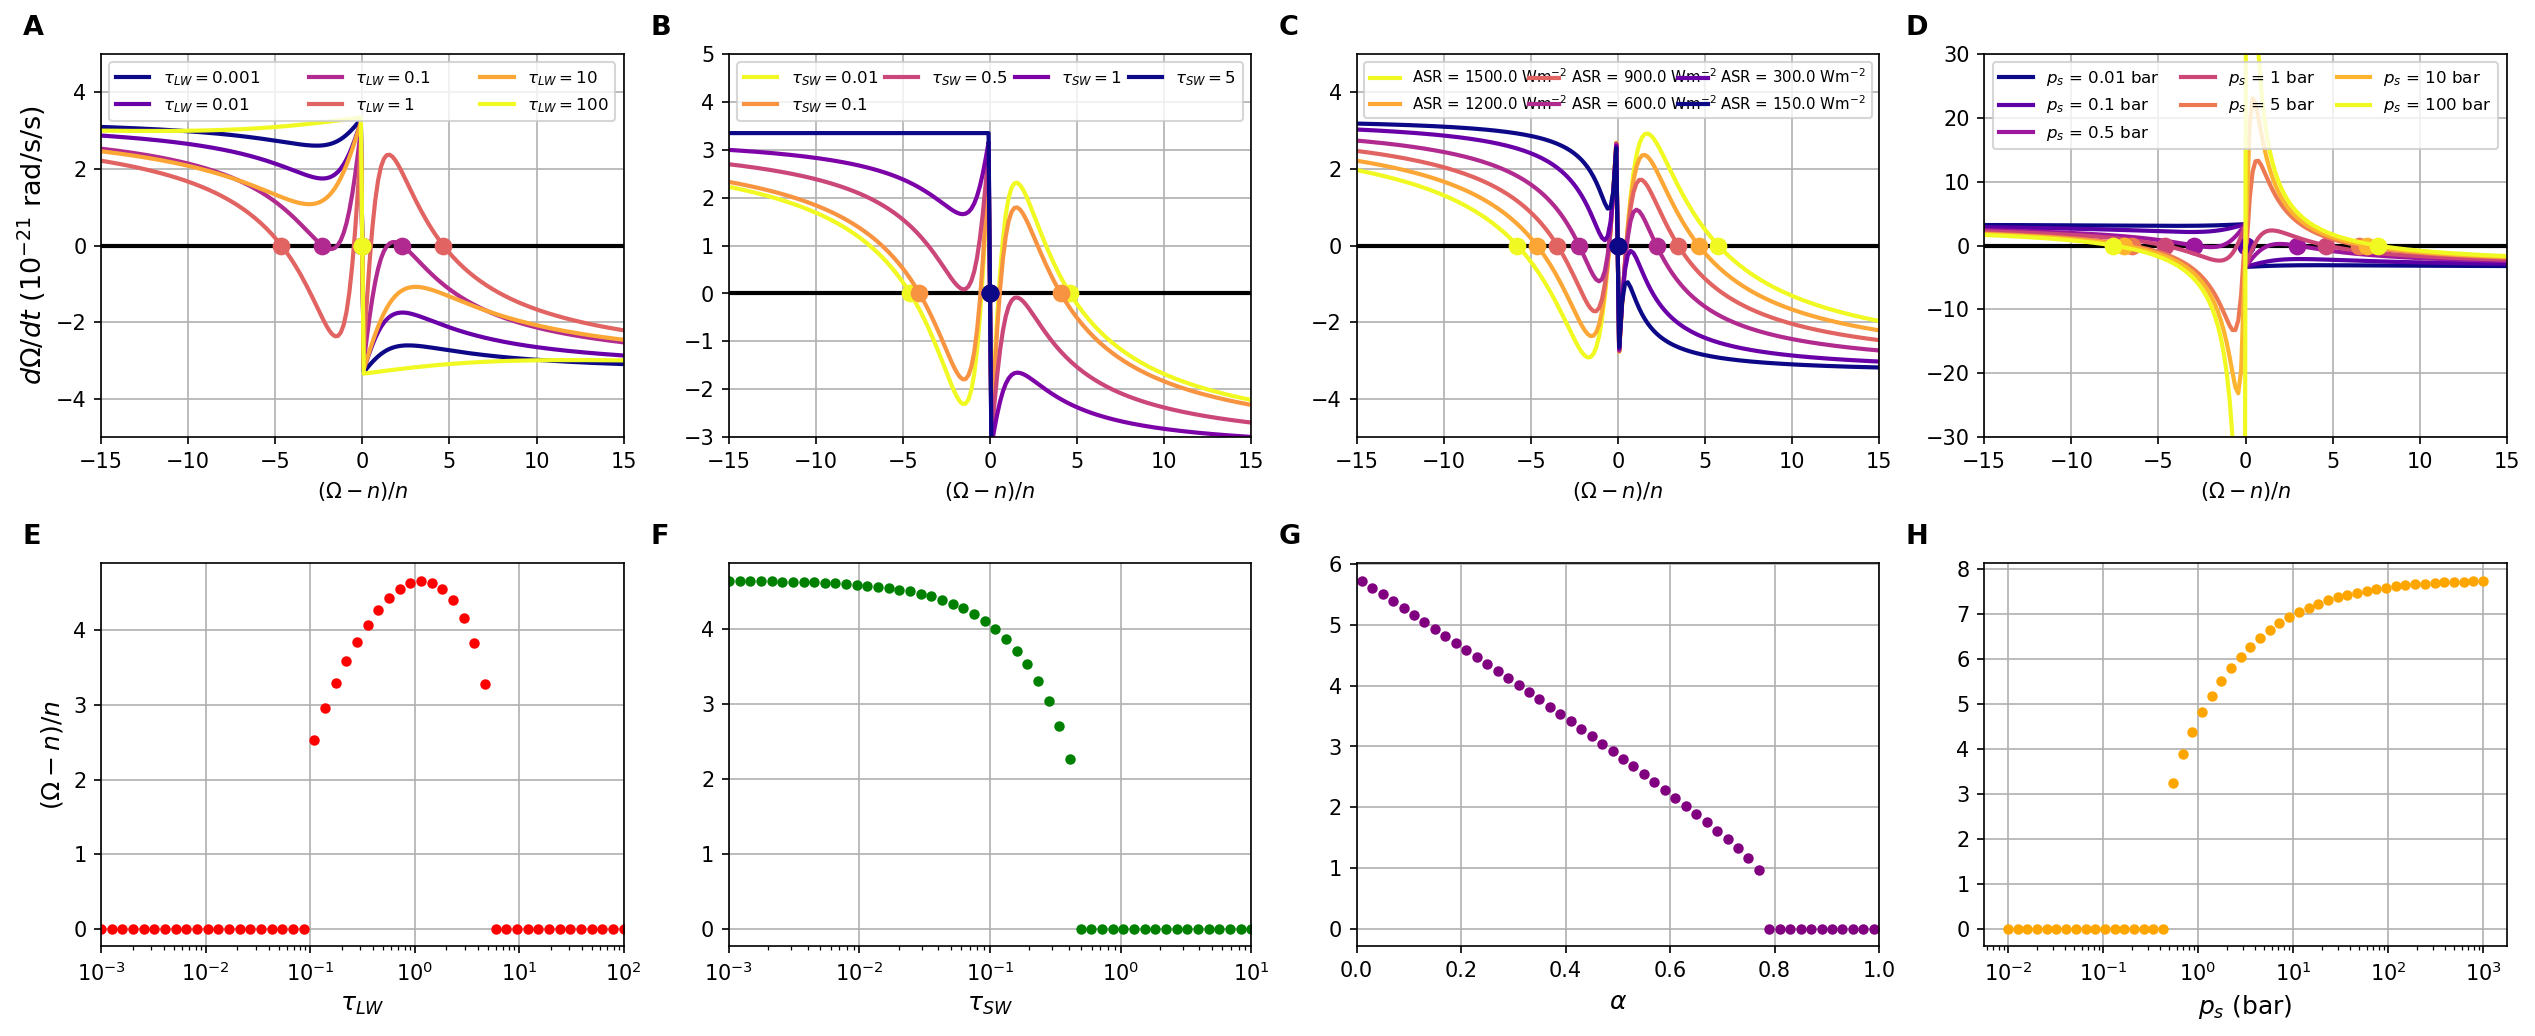

In [4]:
fig, ax = plt.subplots(2,4,figsize=(17,7), dpi=150, tight_layout=True)
Omega_list = np.linspace(-20*n, 21*n, 250)
taulw_list_fig4 = [1e-3, 1e-2, 1e-1, 1, 10, 100]
color= plt.cm.plasma(np.linspace(0,1,len(taulw_list_fig4)))
M_fig4 = 0.7*M_sun
a_fig4 = 0.33*AU
S, n = S_from_a(M_fig4,a_fig4)
k2 = 0.23
Tg = gravitational_tide_torque(M_fig4, R_E, a_fig4, 100,100, k2, Omega_list, n)


ax[0,0].axhline(y=0, linewidth = 2, color = 'k')
ax[0,1].axhline(y=0, linewidth = 2, color = 'k')
ax[0,2].axhline(y=0, linewidth = 2, color = 'k')
ax[0,3].axhline(y=0, linewidth = 2, color = 'k')

for i in range(len(taulw_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4, S, 0.2, 0.0001, taulw_list_fig4[i], 1*bar, Omega_list,n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.0001, taulw_list_fig4[i], 1*bar, 100, 100, k2)/2 # returns 2(Omega-n)
    ax[0,0].plot((Omega_list-n)/n, 1e21*(Ta + Tg)/I , '-', color = color[i], linewidth = 2,label = '$\\tau_{LW} = $' + str(taulw_list_fig4 [i]))
    ax[0,0].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)

ax[0,0].legend(ncol =3, mode='expand', fontsize=8)
ax[0,0].grid()
ax[0,0].set_ylabel('$d\Omega/dt$ ($10^{-21}$ rad/s/s)', fontsize = 13)
ax[0,0].set_xlabel('$(\\Omega -n)/n$')



tausw_list_fig4 = [1e-2, 1e-1, 0.5, 1, 5]
color= plt.cm.plasma_r(np.linspace(0,1,len(tausw_list_fig4)))
for i in range(len(tausw_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4, S, 0.2, tausw_list_fig4[i],1,1*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, tausw_list_fig4[i],1, 1*bar, 100, 100, k2)/2
    ax[0,1].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = '$\\tau_{SW} = $' + str(tausw_list_fig4[i]))
    ax[0,1].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
ax[0,1].legend(ncol =4, mode='expand', fontsize=8)
ax[0,1].grid()
ax[0,1].set_xlabel('$(\\Omega -n)/n$')



alpha_list_fig4 = [0,0.2,0.4,0.6,0.8,0.9]
color= plt.cm.plasma_r(np.linspace(0,1,len(alpha_list_fig4)))
for i in range(len(alpha_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4,S, alpha_list_fig4[i], 0.001,1,1*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,alpha_list_fig4[i], 0.001, 1, 1*bar, 100, 100, k2)/2
    ax[0,2].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = 'ASR = ' + str(np.round(S*(1-alpha_list_fig4[i]),-1)) + ' Wm$^{-2}$')
    ax[0,2].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
    
ax[0,2].legend(ncol =3, mode='expand', fontsize=7.2)
ax[0,2].grid()
ax[0,2].set_xlabel('$(\\Omega -n)/n$')



ps_list_fig4 = [1e-2, 1e-1, 0.5,1, 5,10,100]
color= plt.cm.plasma(np.linspace(0,1,len(ps_list_fig4)))
for i in range(len(ps_list_fig4)):
    S, n = S_from_a(M_fig4,a_fig4)
    Ta = thermal_tide_torque(M_fig4, R_E, a_fig4,S, 0.2, 0.001,1,ps_list_fig4[i]*bar, Omega_list, n)
    eq_rot_analytic = eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, 0.0001, 1,ps_list_fig4[i]*bar,100, 100, k2)/2
    ax[0,3].plot((Omega_list-n)/n, 1e21*(Tg+Ta)/I, '-', color = color[i], linewidth = 2,label = '$p_s$ = ' + str(ps_list_fig4[i]) + ' bar')
    ax[0,3].plot([-eq_rot_analytic/n, eq_rot_analytic/n], [0,0],'.', color = color[i],markersize = 15)
ax[0,3].legend(ncol =3, mode='expand', fontsize=8)
ax[0,3].grid()
ax[0,3].set_xlabel('$(\\Omega -n)/n$')




ax[0,0].set_xlim(-15,15)
ax[0,1].set_xlim(-15,15)
ax[0,2].set_xlim(-15,15)
ax[0,3].set_xlim(-15,15)

ax[0,0].set_ylim(-5,5)
ax[0,1].set_ylim(-3,5)
ax[0,2].set_ylim(-5,5)
ax[0,3].set_ylim(-30,30)


## plot equilibirum rotation rate as a function of model parameters

M_fig4 = 0.7*M_sun
a_fig4 = 0.33*AU
k2 = 0.23

taulw_list_fig4 = 10**np.linspace(-3,2, 50)
tausw_list_fig4 = 10**np.linspace(-3,1, 50)
alpha_list_fig4 = np.linspace(0.01,0.99, 50)
ps_list_fig4 = 10**np.linspace(-2,3,50)

S, n = S_from_a(M_fig4,a_fig4)


for i in range(len(taulw_list_fig4)):
    ax[1,0].plot(taulw_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, 0.0001,taulw_list_fig4[i], 1*bar, 100, 100, k2)/2/n, 'r.', markersize=8)
    ax[1,1].plot(tausw_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4,0.2, tausw_list_fig4[i], 1,1*bar, 100, 100, k2)/2/n, 'g.', markersize=8)
    ax[1,2].plot(alpha_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4,alpha_list_fig4[i], 0.0001,1, 1*bar, 100, 100, k2)/2/n, '.', color = 'purple', markersize=8)
    ax[1,3].plot(ps_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.0001,1, ps_list_fig4[i]*bar, 100, 100, k2)/2/n, '.', color = 'orange', markersize=8)
    # ax[1,3].plot(ps_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.0001,1*ps_list_fig4[i], ps_list_fig4[i]*bar, 100, 100, k2)/2/n, '.', color = 'orangered')
    # ax[1,3].plot(ps_list_fig4[i], eq_rotation_ana(M_fig4, R_E, a_fig4, 0.2, 0.1*ps_list_fig4[i],1*ps_list_fig4[i], ps_list_fig4[i]*bar, 100, 100, k2)/2/n, '.', color = 'gold')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,3].set_xscale('log')

ax[1,0].grid()
ax[1,1].grid()
ax[1,2].grid()
ax[1,3].grid()

ax[1,0].set_xlim(1e-3,1e2)
ax[1,0].set_xticks([1e-3,1e-2,1e-1,1,10,100])

ax[1,1].set_xlim(1e-3,10)
ax[1,1].set_xticks([1e-3,1e-2,1e-1,1,10])

ax[1,2].set_xlim(0,1)
ax[1,2].set_xticks([0,0.2,0.4,0.6,0.8,1])

#ax[3].set_xlim(1e-2,1e3)
ax[1,3].set_xticks([1e-2,1e-1,1,10,100,1000])

ax[1,0].set_ylabel('$(\\Omega-n)/n$',fontsize=12)
ax[1,0].set_xlabel('$\\tau_{LW}$',fontsize=12)
ax[1,1].set_xlabel('$\\tau_{SW}$',fontsize=12)
ax[1,2].set_xlabel('$\\alpha$',fontsize=12)
ax[1,3].set_xlabel('$p_s$ (bar)',fontsize=12)

ax[0,0].text(-0.15, 1.05,'A', transform=ax[0,0].transAxes, size=13, weight='bold')
ax[0,1].text(-0.15, 1.05,'B', transform=ax[0,1].transAxes, size=13, weight='bold')
ax[0,2].text(-0.15, 1.05,'C', transform=ax[0,2].transAxes, size=13, weight='bold')
ax[0,3].text(-0.15, 1.05,'D', transform=ax[0,3].transAxes, size=13, weight='bold')
ax[1,0].text(-0.15, 1.05,'E', transform=ax[1,0].transAxes, size=13, weight='bold')
ax[1,1].text(-0.15, 1.05,'F', transform=ax[1,1].transAxes, size=13, weight='bold')
ax[1,2].text(-0.15, 1.05,'G', transform=ax[1,2].transAxes, size=13, weight='bold')
ax[1,3].text(-0.15, 1.05,'H', transform=ax[1,3].transAxes, size=13, weight='bold')



#plt.savefig('./Paper Plots/SW_2024_Figure4.pdf', bbox_inches = 'tight')

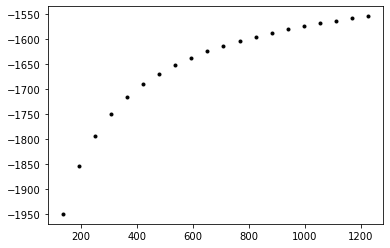

In [23]:
alpha_list = np.linspace(0.1,0.9,20)
S = 1360
for alpha in alpha_list:
    plt.plot((S*(1-alpha)), qo_wo(S, alpha, 0.0001, 1, 1*bar)[0]/qo_wo(S, alpha, 0.0001, 1, 1*bar)[1]*2*n,'k.')
    